In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/TM.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-11,161.449997,162.270004,157.050003,157.059998,157.059998,464200
1,2022-05-12,157.199997,159.699997,156.960007,158.539993,158.539993,517100
2,2022-05-13,159.949997,162.130005,159.630005,161.330002,161.330002,246200
3,2022-05-16,159.429993,160.020004,157.949997,159.210007,159.210007,201500
4,2022-05-17,159.130005,160.220001,158.919998,159.979996,159.979996,273500


In [ ]:
data = df
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-11,161.449997,162.270004,157.050003,157.059998,157.059998,464200
1,2022-05-12,157.199997,159.699997,156.960007,158.539993,158.539993,517100
2,2022-05-13,159.949997,162.130005,159.630005,161.330002,161.330002,246200
3,2022-05-16,159.429993,160.020004,157.949997,159.210007,159.210007,201500
4,2022-05-17,159.130005,160.220001,158.919998,159.979996,159.979996,273500


<Axes: xlabel='Date'>

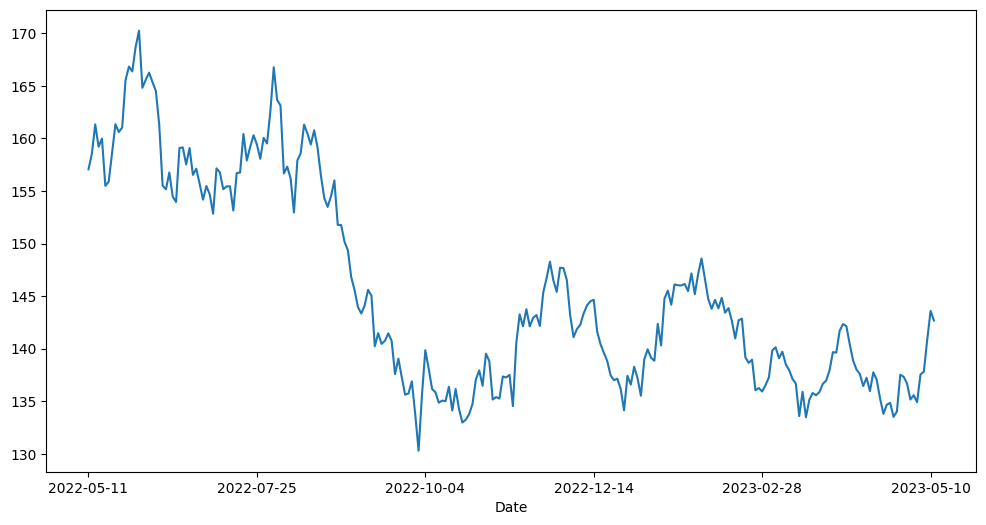

In [ ]:
data = data.set_index('Date')
data["Close"].plot(figsize=(12,6))

In [ ]:
data["Close Diff"]=data["Close"] - data["Close"].shift(1).fillna(method='bfill')

In [ ]:
data["Close Diff"]

Date
2022-05-11    0.000000
2022-05-12    1.479995
2022-05-13    2.790009
2022-05-16   -2.119995
2022-05-17    0.769989
                ...   
2023-05-05    2.629989
2023-05-08    0.270005
2023-05-09    3.040008
2023-05-10    2.739990
2023-05-11   -0.919998
Name: Close Diff, Length: 252, dtype: float64

<Axes: xlabel='Date'>

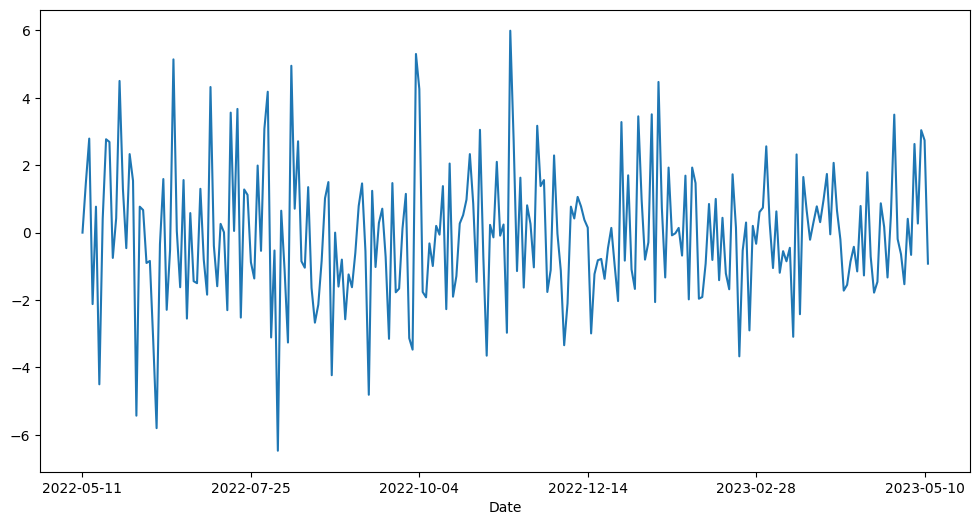

In [ ]:
data["Close Diff"].plot(figsize=(12,6))

In [ ]:
import numpy as np
 
def generate_data(co2_arr,n_seq):
    x, y = [],[]                              
    for i in range(co2_arr.shape[0]-n_seq):   
        x.append(co2_arr[i:i+n_seq-1])        
        y.append(co2_arr[i+n_seq-1:i+n_seq])  
    x = np.array(x).reshape(-1,n_seq-1,1)     
    y = np.array(y) 
    return x,y

In [ ]:
from tensorflow.keras import layers, models
 
rnn = models.Sequential([
    layers.LSTM(128),
    layers.Dense(1)
])

rnn.compile(loss='mse', optimizer='adam')

In [ ]:
x, y = generate_data(data["Close Diff"], n_seq=13)
rnn.fit(x, y, shuffle=True, batch_size=64, epochs=220)

Epoch 1/220
4/4 [==============================] - 2s 6ms/step - loss: 3.8998
Epoch 2/220
4/4 [==============================] - 0s 8ms/step - loss: 3.8798
Epoch 3/220
4/4 [==============================] - 0s 5ms/step - loss: 3.8615
Epoch 4/220
4/4 [==============================] - 0s 5ms/step - loss: 3.8566
Epoch 5/220
4/4 [==============================] - 0s 5ms/step - loss: 3.8478
Epoch 6/220
4/4 [==============================] - 0s 6ms/step - loss: 3.8432
Epoch 7/220
4/4 [==============================] - 0s 6ms/step - loss: 3.8360
Epoch 8/220
4/4 [==============================] - 0s 7ms/step - loss: 3.8354
Epoch 9/220
4/4 [==============================] - 0s 7ms/step - loss: 3.8343
Epoch 10/220
4/4 [==============================] - 0s 6ms/step - loss: 3.8254
Epoch 11/220
4/4 [==============================] - 0s 6ms/step - loss: 3.8223
Epoch 12/220
4/4 [==============================] - 0s 6ms/step - loss: 3.8239
Epoch 13/220
4/4 [==============================] - 0s 6ms/st

In [ ]:
history = data["Close Diff"].values[-12:].reshape(1,-1,1)     
true_vals = []
prev_true = data["Close"].values[-1]                          
for i in range(14):                                             
    p_diff = rnn.predict(history).reshape(1,-1,1)               
    history = np.concatenate((history[:,1:,:],p_diff),axis=1)   
    true_vals.append(prev_true+p_diff[0,0,0])                   
    prev_true = true_vals[-1]    

1/1 [==============================] - 0s 20ms/step


In [ ]:
history = data["Close Diff"].values[-12:].reshape(1,-1,1)
prev_true = data["Close"].values[-1]
history = np.concatenate((history[:,1:,:],p_diff),axis=1)
true_vals.append(prev_true+p_diff[0,0,0])
prev_true = true_vals[-1]

In [ ]:
true_vals

[143.34110338482665,
 141.09189326557922,
 141.7158015469055,
 143.0021947124939,
 141.96688301358031,
 139.88728720936584,
 137.52068335804748,
 135.16924102101135,
 136.15929419789123,
 135.49231405052947,
 133.61056501660156,
 136.7264207104187,
 139.88090712818908,
 139.49674184117126,
 142.28583271298217]

Text(0.5, 1.0, 'Evolution of CO2 Concentration over Time')

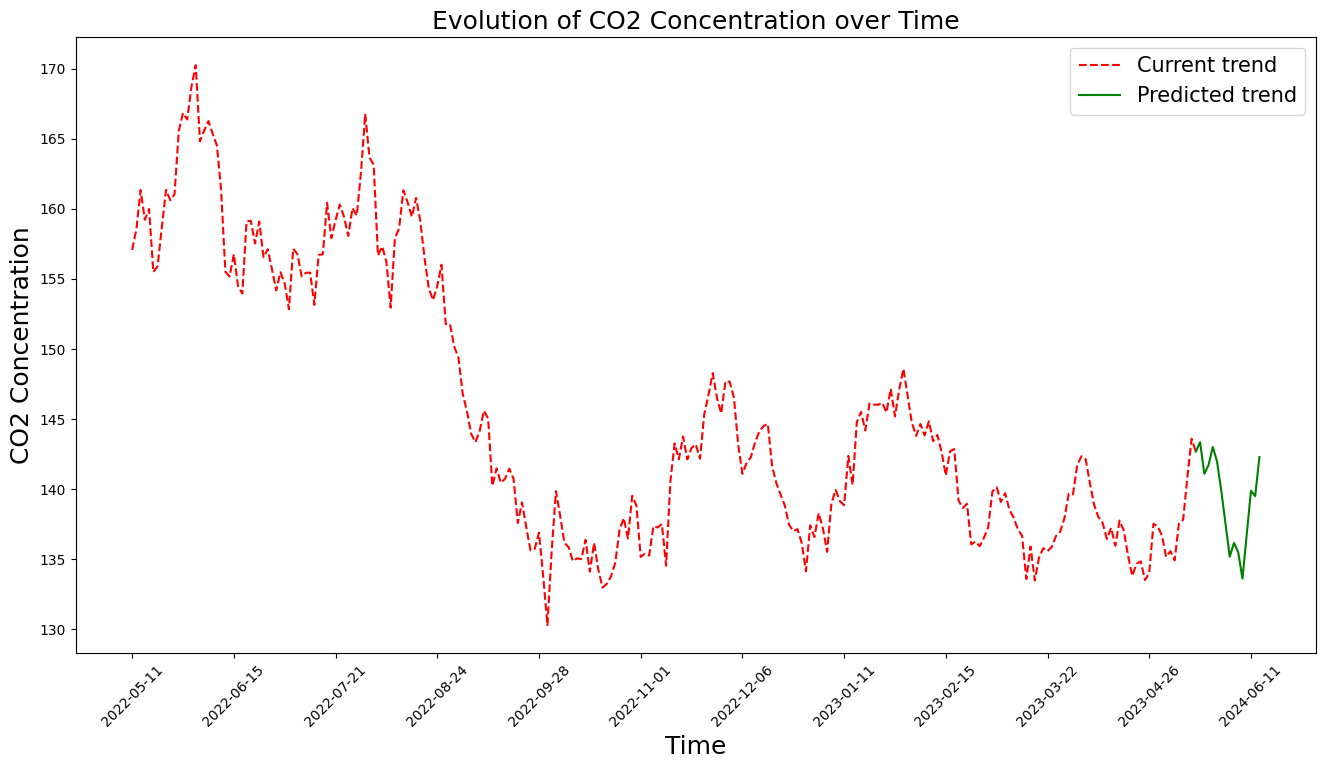

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the current and predicted trends
plt.figure(figsize=(16,8))

# Plotting the current trend
plt.plot(data["Close"], c='r', linestyle='--', label="Current trend")

# Creating a pd.Series from predictions
pred_ser = pd.Series(
    [data["Close"].values[-1]]+true_vals, 
    index=[data.index[-1]]+[pd.to_datetime(data.index[-1], format="%Y-%m-%d")+pd.DateOffset(months=i+1) for i in range(15)]
)
pred_ser.index = pd.to_datetime(pred_ser.index).strftime('%Y-%m-%d')

# Plotting the predictions
plt.plot(pred_ser, c='g', label='Predicted trend')

# Annotating the plot
plt.xticks(np.arange(0, data["Close"].shape[0]+15, 24),rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('CO2 Concentration', fontsize=18)
plt.legend(prop={'size': 15})
plt.title('Evolution of CO2 Concentration over Time', fontsize=18)

In [ ]:
history

array([[[ 3.5       ],
        [-0.190002  ],
        [-0.64      ],
        [-1.529998  ],
        [ 0.410003  ],
        [-0.660003  ],
        [ 2.629989  ],
        [ 0.270005  ],
        [ 3.040008  ],
        [ 2.73999   ],
        [-0.919998  ],
        [-2.25056052]]])